<a href="https://colab.research.google.com/github/karind7/Data-Collection-and-Storage-SQL-/blob/main/Data_Collection_and_Storage_(SQL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  pass

# **importing the files**

In [ ]:
try:
  data_01 = pd.read_csv("/content/drive/MyDrive/data science/project_sql_result_01.csv", error_bad_lines=False)
except:
  data_01 = pd.read_csv("/datasets/project_sql_result_01.csv")

In [ ]:
try:
  data_04 = pd.read_csv("/content/drive/MyDrive/data science/project_sql_result_04.csv", error_bad_lines=False)
except:
  data_04 = pd.read_csv("/datasets/project_sql_result_04.csv")

In [ ]:
try:
  data_07 = pd.read_csv("/content/drive/MyDrive/data science/project_sql_result_07.csv", error_bad_lines=False)
except:
  data_07 = pd.read_csv("/datasets/project_sql_result_07.csv")

# **studying the data**

In [ ]:
data_01.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [ ]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
data_01.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [ ]:
data_04.head(5)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [ ]:
data_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
data_04.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [ ]:
data_07.head(5)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [ ]:
data_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [ ]:
data_07.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


min trip duration_seconds is zero, maybe it's trips that were cancelled. in any case we will remove them

we have not found any missing values in the info of the data or word data in the description

**identify the top 10 neighborhoods in terms of drop-offs**

In [ ]:
data_04.sort_values(by = "average_trips", ascending=False)
data_04[:10]

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


# **making sure the data types are correct**

In [ ]:
#change the start_ts column to datetime and the duration_seconds to integers
data_07["start_ts"] = pd.to_datetime(data_07['start_ts'], format='%Y%m%d %H:%M:%S.%f')
data_07["duration_seconds"] = data_07["duration_seconds"].astype(int)
data_07.drop(data_07[data_07["duration_seconds"] <= 0].index, inplace=True)
data_07.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1062 non-null datetime64[ns]
weather_conditions    1062 non-null object
duration_seconds      1062 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 33.2+ KB


In [ ]:
data_07.describe()

,duration_seconds
count,1062.000000
mean,2083.435970
std,755.651796
min,60.000000
25%,1440.000000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [ ]:
data_01[data_01.duplicated()]

,company_name,trips_amount


In [ ]:
data_04[data_04.duplicated()]

,dropoff_location_name,average_trips


In [ ]:
data_07[data_07.duplicated()]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260
74,2017-11-11 08:00:00,Good,1380
76,2017-11-04 09:00:00,Good,1380
117,2017-11-11 07:00:00,Good,1380
119,2017-11-04 14:00:00,Good,3300
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380
1058,2017-11-25 12:00:00,Good,1440
1062,2017-11-11 06:00:00,Good,1500
1065,2017-11-11 13:00:00,Good,2100


In [ ]:
data_07[data_07.duplicated()]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260
74,2017-11-11 08:00:00,Good,1380
76,2017-11-04 09:00:00,Good,1380
117,2017-11-11 07:00:00,Good,1380
119,2017-11-04 14:00:00,Good,3300
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380
1058,2017-11-25 12:00:00,Good,1440
1062,2017-11-11 06:00:00,Good,1500
1065,2017-11-11 13:00:00,Good,2100


we have seen there are data dypes we needed to chang to datetime and int, and we have removed the duplicated data and the corrupted data

# **making graphs and drawing conclusions**

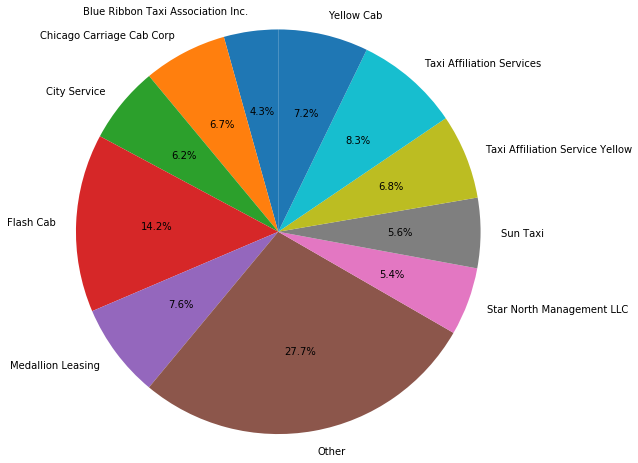

In [ ]:
top_companies = data_01["company_name"][:10].tolist()
data_01.loc[~data_01["company_name"].isin(top_companies), "company_name"] = "Other"
data_01 = data_01.groupby("company_name").sum().reset_index()

amout = data_01["trips_amount"]
name = data_01["company_name"]

fig1, ax1 = plt.subplots(figsize=(8, 8))

ax1.pie(amout, labels=name, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The companies that had the most trips made are Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab, Taxi Affiliation Service Yellow, Chicago Carriage Cab Corp, City Service, Sun Taxi and Star North Management LLC by far, they could be the oldest companies with repotashen, or cheaper or maybe better app or ads

In [ ]:
data_04.sort_values(by = "average_trips", ascending=False)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


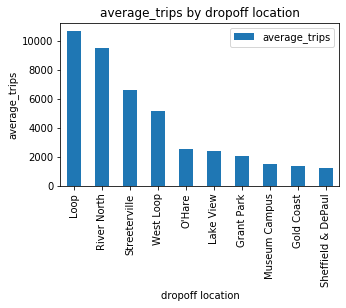

In [ ]:
plt.rcParams["figure.figsize"] = (5,3)
data_04[:10].plot(x = "dropoff_location_name", y = "average_trips", kind = "bar")
plt.title("average_trips by dropoff location")
plt.xlabel('dropoff location')
plt.ylabel('average_trips')
plt.show()

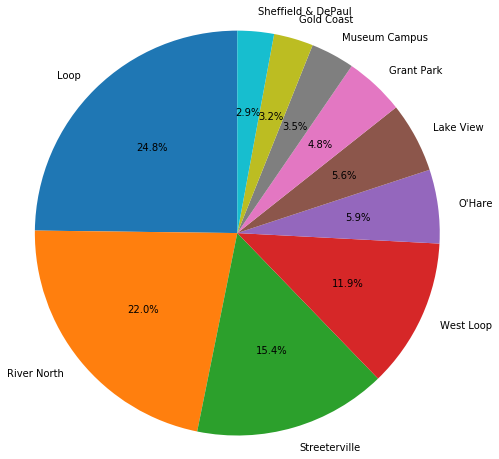

In [ ]:
amout = data_04["average_trips"][:10]
name = data_04["dropoff_location_name"][:10]

fig1, ax1 = plt.subplots(figsize=(8, 8))

ax1.pie(amout, labels=name, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

we can see that of the 10 neighborhoods in terms of drop-offs the most popular area Loop, river North, Streeterville, West Loop by far, they could be more popular because there is more population density there or its the place were all the resturants,bars and theaters.

# **Testing hypotheses**

In [ ]:
filter_data = data_07.query('weather_conditions ==  "Bad" and start_ts.dt.weekday == 5')
filter_data

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969
30,2017-11-18 12:00:00,Bad,1980
34,2017-11-04 17:00:00,Bad,2460
51,2017-11-04 16:00:00,Bad,2760
52,2017-11-18 12:00:00,Bad,2460
...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560
1032,2017-11-18 10:00:00,Bad,1908
1053,2017-11-18 12:00:00,Bad,2400
1061,2017-11-18 16:00:00,Bad,2186


In [ ]:
data_without = data_07.query('~(weather_conditions ==  "Bad" and start_ts.dt.weekday == 5)')
data_without

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700
1062,2017-11-11 06:00:00,Good,1500
1064,2017-11-11 10:00:00,Good,1318
1065,2017-11-11 13:00:00,Good,2100


Test the hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

using the standard alpha 5% and the test Independent Sample T-Test. In this type of test, you are comparing the average of two independent unrelated groups. Meaning, you are comparing samples from two different populations and are testing whether or not they have a different average.

H0: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

H1: The average duration of rides from the Loop to O'Hare International Airport doesn't changes on rainy Saturdays.

In [ ]:
alpha = 0.05
results = st.ttest_ind(filter_data["duration_seconds"], data_without["duration_seconds"])
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")
else:
    print("'We can't reject the null hypothesis that The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.")

p-value:  1.3318772977743245e-11
We reject the null hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.


in conclusion we changed the data types and removed the duplicates, and we found the most popular texi companies and the most popular drop off citys and we found that there is no connection between durashen of trips deppends of whether